In [ ]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000760498"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000760498
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,BANCFIRST CORP /OK/
Ticker,BANF


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,57.0,3.265474e+01,6.546190e+00,22.1,27.69,31.36,36.98,47.05
interest income,9.0,4.503333e+07,7.928435e+06,35028000.0,38491000.00,44134000.00,46470000.00,57845000.00
net income,57.0,1.496958e+07,6.518699e+06,6260000.0,11034000.00,13372000.00,17493000.00,32883000.00
net interest income,57.0,4.377347e+07,1.256467e+07,27413000.0,35670000.00,40712000.00,49976000.00,97251000.00
provision for loan losses,57.0,1.505263e+06,1.654731e+06,-3115000.0,718000.00,1175000.00,1841000.00,9214000.00


# Plots

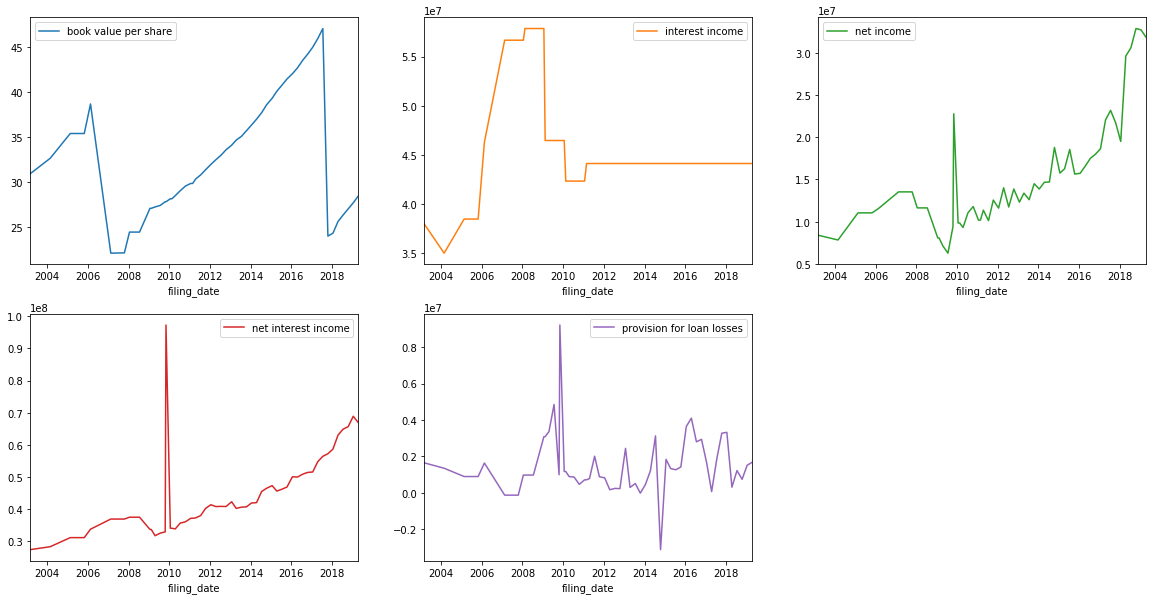

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000760498 book value per share        2003Q1 to 2003Q3: 3 periods    missing   
           book value per share        2004Q1 to 2004Q3: 3 periods    missing   
           book value per share        2005Q1 to 2005Q3: 3 periods    missing   
           book value per share        2006Q1 to 2006Q3: 3 periods    missing   
           book value per share        2007Q1 to 2007Q3: 3 periods    missing   
           book value per share        2008Q1 to 2008Q3: 3 periods    missing   
           interest income             2003Q1 to 2003Q3: 3 periods    missing   
           interest income             2004Q1 to 2004Q3: 3 periods    missing   
           interest income             2005Q1 to 2005Q3: 3 periods    missing   
           interest income             2006Q1 to 2006Q3: 3 periods    missing   
           interest income             2007Q1 to 2007Q3: 3 periods    missing   
           interest income             2008Q1 to 2008Q3: 3 periods    missing   
           interest income             2009Q1 to 2009Q3: 3 periods    missing   
           interest income             2010Q1 to 2010Q3: 3 periods    missing   
           interest income            2011Q1 to 2019Q1: 33 periods    missing   
           net income                  2003Q1 to 2003Q3: 3 periods    missing   
           net income                  2004Q1 to 2004Q3: 3 periods    missing   
           net income                  2005Q1 to 2005Q3: 3 periods    missing   
           net income                  2006Q1 to 2006Q3: 3 periods    missing   
           net income                  2007Q1 to 2007Q3: 3 periods    missing   
           net income                  2008Q1 to 2008Q3: 3 periods    missing   
           net income                                       2009Q3  duplicate   
           net interest income         2003Q1 to 2003Q3: 3 periods    missing   
           net interest income         2004Q1 to 2004Q3: 3 periods    missing   
           net interest income         2005Q1 to 2005Q3: 3 periods    missing   
           net interest income         2006Q1 to 2006Q3: 3 periods    missing   
           net interest income         2007Q1 to 2007Q3: 3 periods    missing   
           net interest income         2008Q1 to 2008Q3: 3 periods    missing   
           net interest income                              2009Q3  duplicate   
           provision for loan losses   2003Q1 to 2003Q3: 3 periods    missing   
           provision for loan losses   2004Q1 to 2004Q3: 3 periods    missing   
           provision for loan losses   2005Q1 to 2005Q3: 3 periods    missing   
           provision for loan losses   2006Q1 to 2006Q3: 3 periods    missing   
           provision for loan losses   2007Q1 to 2007Q3: 3 periods    missing   
           provision for loan losses   2008Q1 to 2008Q3: 3 periods    missing   
           provision for loan losses                        2009Q3  duplicate   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0000760498 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           inte

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()